In [4]:
#Load Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [5]:
# 1.Load dataset
airbnb = pd.read_csv('C:/Users/yunyeo/.jupyter/Airbnb Singapore Listings.csv')
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,84,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,80,90,18,2014-12-26,0.24,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,70,6,20,2015-10-01,0.18,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,167,90,20,2020-01-17,0.19,8,365
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,95,90,24,2019-10-13,0.22,8,365


In [7]:
#Understanding the shape of data
airbnb.shape

(7323, 16)

In [8]:
airbnb['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region',
       'North-East Region', 'West Region'], dtype=object)

In [9]:
airbnb['neighbourhood'].unique()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bedok', 'Bukit Merah',
       'Newton', 'Geylang', 'River Valley', 'Serangoon', 'Jurong West',
       'Rochor', 'Marine Parade', 'Pasir Ris', 'Outram', 'Punggol',
       'Queenstown', 'Tanglin', 'Kallang', 'Novena', 'Singapore River',
       'Toa Payoh', 'Ang Mo Kio', 'Bukit Batok', 'Museum',
       'Downtown Core', 'Choa Chu Kang', 'Hougang', 'Orchard',
       'Sembawang', 'Clementi', 'Bukit Panjang', 'Jurong East',
       'Sengkang', 'Bishan', 'Central Water Catchment', 'Yishun',
       'Mandai', 'Southern Islands', 'Western Water Catchment', 'Tuas',
       'Sungei Kadut', 'Pioneer', 'Marina South'], dtype=object)

In [10]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [11]:
# 2.Cleaning of dataset
    
#2.1 Checking column with missing values
airbnb.isnull().sum()


id                                   0
name                                 1
host_id                              0
host_name                           22
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2835
reviews_per_month                 2835
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [12]:
#2.2 Removing redundant variables - missing values
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [13]:
#2.3 Replacing all the missing values

airbnb['reviews_per_month'].fillna(0,inplace=True)

In [14]:
airbnb.to_excel('C:/Users/yunyeo/.jupyter/Airbnb_Singapore_cleaned.xlsx')

Text(0, 0.5, 'Count of listings')

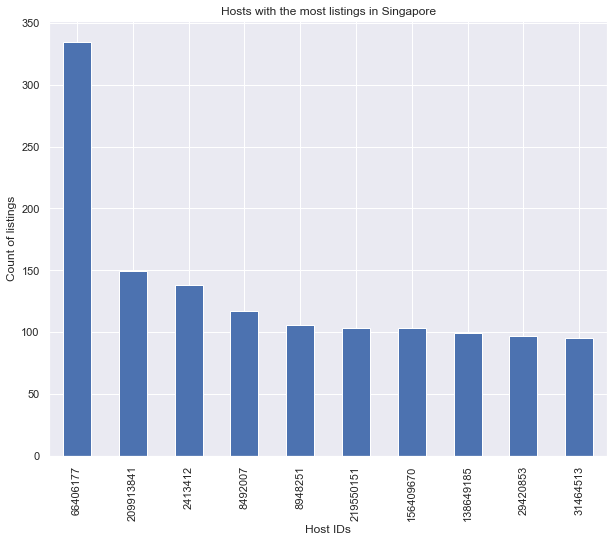

In [15]:
# 3. Exploring and visualizing data

# 3.1 Top host with most listings in Singapore
top_host_id = airbnb['host_id'].value_counts().head(10)


sns.set(rc={'figure.figsize':(10,8)})

barchart = top_host_id.plot(kind='bar')
barchart.set_title('Hosts with the most listings in Singapore')
barchart.set_xlabel('Host IDs')
barchart.set_ylabel('Count of listings')

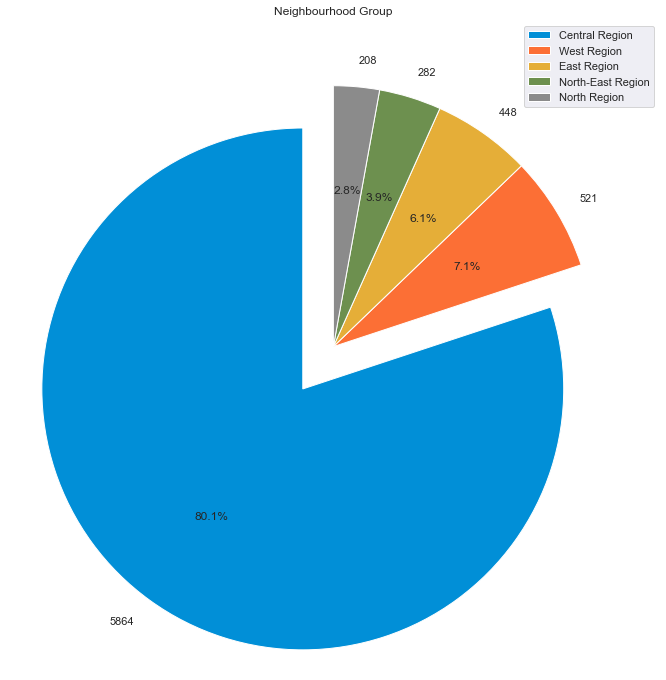

In [16]:
# 3.2 Top Region area
#visualize the proportion of listing count on each region area using 'neighbourhood_group' columns

labels = airbnb.neighbourhood_group.value_counts().index
colors = ['#018fd7','#fc6f35','#e5ae38','#6d904f','#8b8b8b']
explode = (0.2,0,0,0,0)

shape = airbnb.neighbourhood_group.value_counts().values
plt.figure(figsize=(12,12))
plt.pie(shape, explode = explode, labels=shape, colors= colors, autopct = '%1.1f%%', startangle=90)
plt.legend(labels)
plt.title('Neighbourhood Group')
plt.show()

In [17]:
#Top listing areas 
#Look at the top 10 areas that have highest numbers of listings 
airbnb.neighbourhood.value_counts().head(10)

Kallang          1046
Geylang           821
Novena            551
Rochor            496
Downtown Core     481
Outram            463
Bukit Merah       359
River Valley      354
Bedok             324
Queenstown        243
Name: neighbourhood, dtype: int64

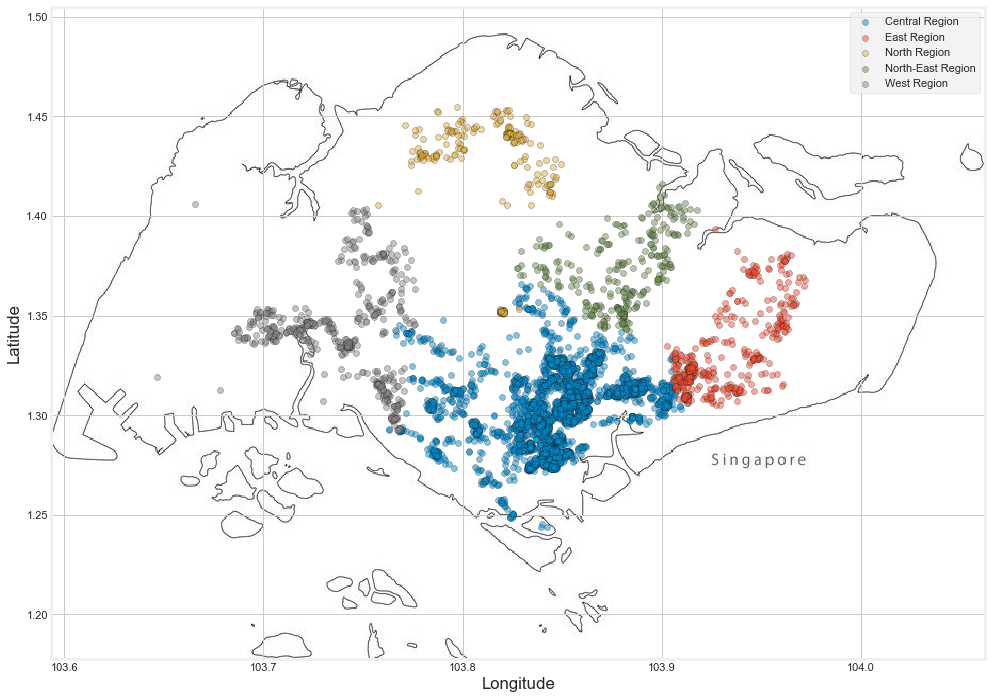

In [18]:
#Visualize the scatter plot map of every listing and grouping it by color on each different region

plt.figure(figsize=(18,12))
plt.style.use('fivethirtyeight')
BBox = (103.5935, 104.0625, 1.1775, 1.5050)
sg_map = plt.imread('C:/Users/yunyeo/.jupyter/SGmap.jpg')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()

groups = airbnb.groupby('neighbourhood_group')
for name, group in groups: 
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
    
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

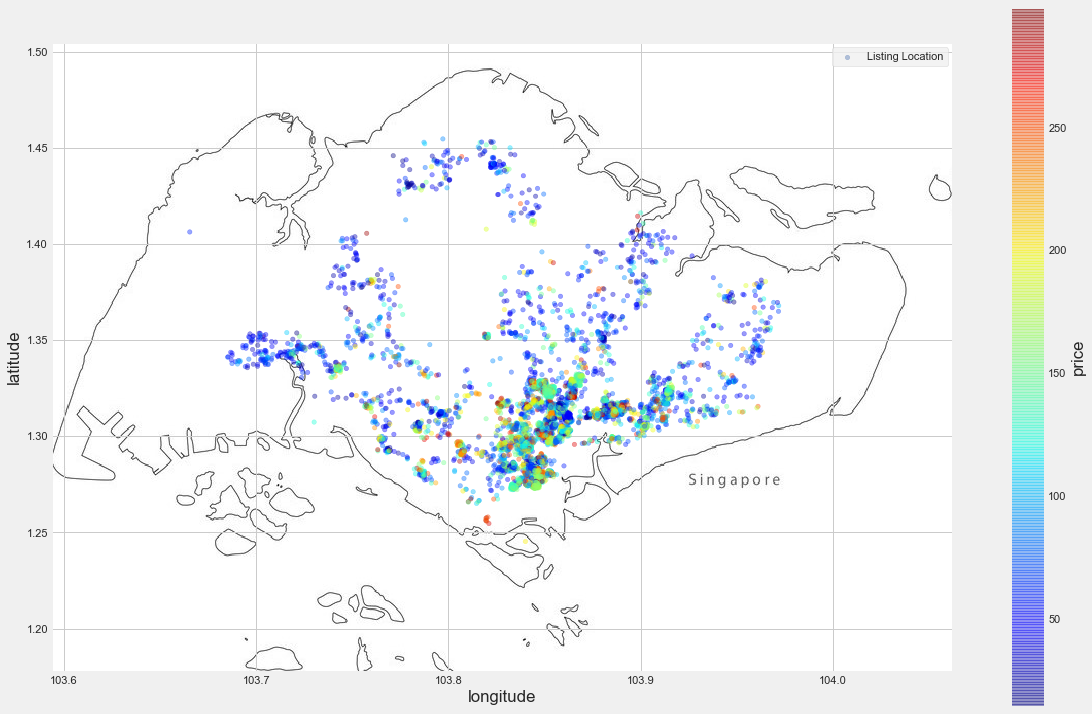

In [19]:
#3.3 Price map
# Remove some outlier data as some data prices have value far from IQR interquartile range

airbnb_1 = airbnb[airbnb.price < 300]

plt.figure(figsize=(18,12))

sg_map = plt.imread('C:/Users/yunyeo/.jupyter/SGmap.jpg')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()
airbnb_1.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

#Price relatively go up towards the center part of the central region

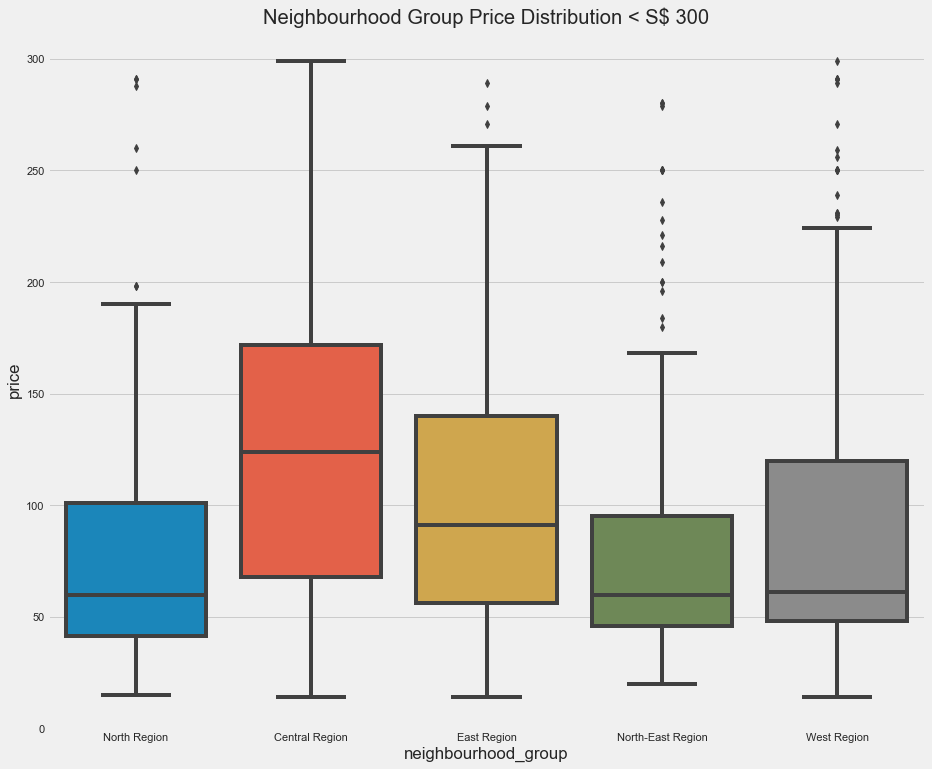

In [20]:
#3.4 Price distribution
#To understand more about the listing price range grouped by 'neighbourhood_group'

plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='price', x='neighbourhood_group', data = airbnb_1)
plt.title('Neighbourhood Group Price Distribution < S$ 300')
plt.show() 
 


From the data, central region has the most expensive price per night.

In [21]:
#3.5 Finding the top listing words

#Find out what are the most used words in the listing name. 
#Creating a function to collect words 

#Create empty list where we are going to put the name strings
names=[]

#Getting name string from 'name' column and appending it to empty list
for name in airbnb.name:
    names.append(name)
    
#Setting a function to split name strings into seperate words
def split_name(name): 
    s = str(name).split()
    return s 

#Create empty list where we are going to count the words
names_count = []

#Getting name string to appending it to the names_count list
for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

[Text(0, 0, 'room'),
 Text(0, 0, 'mrt'),
 Text(0, 0, 'in'),
 Text(0, 0, 'near'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, '@'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'to'),
 Text(0, 0, '&'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'private'),
 Text(0, 0, '2'),
 Text(0, 0, 'with'),
 Text(0, 0, 'city'),
 Text(0, 0, 'for'),
 Text(0, 0, '1'),
 Text(0, 0, 'spacious'),
 Text(0, 0, 'condo'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'cosy'),
 Text(0, 0, 'bed'),
 Text(0, 0, 'the'),
 Text(0, 0, 'at'),
 Text(0, 0, '3')]

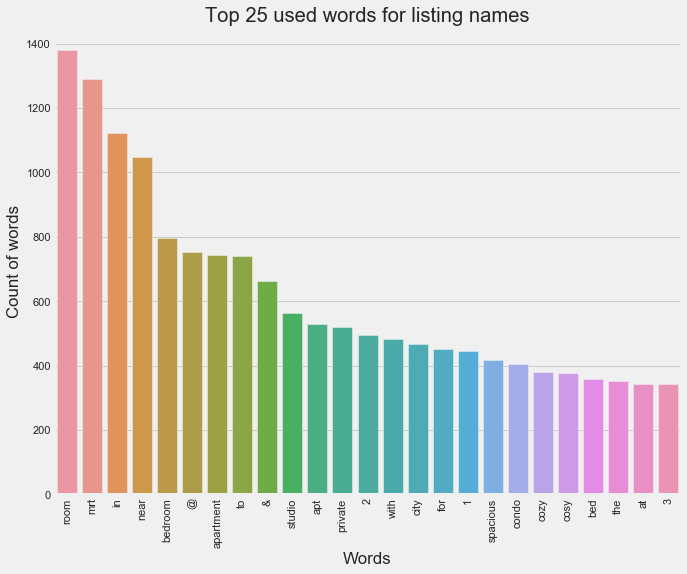

In [22]:
#Import counter library to count and generate raw data which contains top 25 words used by host

from collections import Counter

top_25 = Counter(names_count).most_common()
top_25 = top_25[:25]

# convert data into dataframe and visualize our findings
word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'Words',1:'Counts'}, inplace=True)

viz_count = sns.barplot(x='Words',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 used words for listing names')
viz_count.set_ylabel('Count of words')
viz_count.set_xlabel('Words')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

In [35]:
word_count_data.head()

#Export to excel
word_count_data.to_excel('C:/Users/yunyeo/.jupyter/word_count.xlsx')

In [37]:
word_count_data.head(20)

,Words,Counts
0,room,1380
1,mrt,1291
2,in,1122
3,near,1048
4,bedroom,797
5,@,753
6,apartment,745
7,to,740
8,&,662
9,studio,564


In [33]:
#Top 10 most reviewed listings

top_10_reviews = airbnb.nlargest(10, 'number_of_reviews')
top_10_reviews.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
108,Luxuriously Spacious Studio Apt.,7642747,East Region,Bedok,1.32122,103.91492,Entire home/apt,139,2,370,4.72,1,1
986,Spacious room near Woodleigh MRT,44793532,Central Region,Toa Payoh,1.33514,103.87622,Private room,49,1,354,6.74,2,145
116,Heritage Shophouse Right in Epicentre of Sights,1346787,Central Region,Outram,1.28448,103.84360,Private room,89,1,336,5.06,3,365
554,"Clean cosy room, 7 mins to Sentosa",34333799,Central Region,Bukit Merah,1.27718,103.82167,Private room,73,3,322,5.55,1,257
212,Central Haven,21313007,Central Region,Tanglin,1.29312,103.82979,Entire home/apt,218,14,312,4.52,1,1
369,The Lily Room,30080617,East Region,Tampines,1.34463,103.96107,Private room,60,30,296,4.68,7,180
368,The Private Sanctuary,30080617,East Region,Tampines,1.34495,103.96043,Private room,70,90,285,4.54,7,0
584,1 Super Single Bed In Private Room,40912923,Central Region,Geylang,1.31422,103.90481,Private room,41,1,285,4.86,4,0
331,S5 @ City Central,25116861,Central Region,Rochor,1.30386,103.85459,Entire home/apt,108,5,283,4.37,10,180
1194,"Bright & Airy, Safari-Colonial Loft!",17032962,Central Region,Rochor,1.31225,103.85431,Entire home/apt,152,1,270,5.35,16,176


In [32]:
#Average price per night
price_avg = top_10_reviews.price.mean()
print('Average price per night: S$ {}'.format(price_avg))

Average price per night: S$ 99.9


Comments: Top 10 most popular listings on Airbnb Singapore have an average price of S$99.9 with most of the listings under S$90. 